In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
import numpy as np
import matplotlib.pyplot as plt
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
import os
from tensorflow.keras import models 


import matplotlib
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'mathtext.fontset': 'cm'})
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
data = cf.gen_and_load(10**7,10**5)
train_x ,train_y = data[0]
val_x,val_y = data[1]

In [3]:
model = models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/107.0datapoints.h5')
v_nn = model.predict(train_x)[:,0]

2022-03-18 12:04:55.426541: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-18 12:04:55.426574: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sean-PC
2022-03-18 12:04:55.426581: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sean-PC
2022-03-18 12:04:55.426704: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-03-18 12:04:55.426724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-03-18 12:04:55.426728: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-03-18 12:04:55.427101: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in

In [4]:
ape = abs((v_nn-train_y)/train_y)*100

In [5]:
dir ='/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/Analytics_Figs'

In [6]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
#For fitting define x,y
xs = train_y[:10**3]
ys = ape[:10**3]

#Looking at a power law
lx = np.log10(xs)
ly = np.log10(ys)
#Simple lineregression model
model = linregress(lx,ly)


x_prime = np.linspace(-2.5,0,50)
y_prime = model.intercept + model.slope*x_prime
y_prim_min = model.intercept-model.intercept_stderr+ (model.slope+model.stderr)*x_prime
y_prim_max = model.intercept+model.intercept_stderr+ (model.slope-model.stderr)*x_prime


In [7]:
print('The R value of the linear fit is', model.rvalue**2)
print('The P value of the fit is ',model.pvalue)

The R value of the linear fit is 0.2569200206883671
The P value of the fit is  2.202239122169263e-66


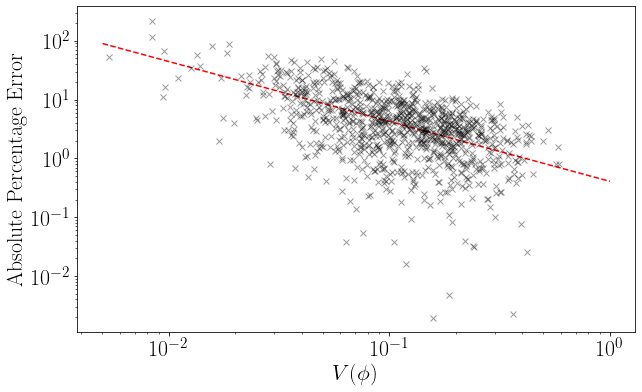

In [8]:


x = np.logspace(-2.3,0)

fig , ax = plt.subplots(1,1,figsize = (10,6))
ax.loglog(x,10**y_prime,color = 'red',linestyle = '--')
#ax.loglog(x,-intercept*x**slope, c = 'blue')
ax.loglog(train_y[:10**3],ape[:10**3], marker = 'x', c = 'black',linestyle = '',alpha = 0.4)
ax.set_ylabel('Absolute Percentage Error')
ax.set_xlabel('$V(\phi)$')
#ax.set_ylim(1,1000)
#plt.tight_layout()
ext = 'ape.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

In [9]:
print(np.max(ape))

25226.904693243956


In [10]:
cutoff = 0.25
fraction  = len(np.where(train_y>cutoff)[0])
print('Fraction of Data with $V(\phi)>{}$ = {}'.format(cutoff,fraction/train_y.shape[0]))

Fraction of Data with $V(\phi)>0.25$ = 0.12303424242424242


In [11]:
cutoffs = np.linspace(0,1,100)
fraction_mape = []
for i in cutoffs:
    index = np.where(train_y>i)
    fraction_mape.append(np.mean(abs((v_nn[index]-train_y[index])/train_y[index]))*100)

In [12]:
fractions = []
for i in cutoffs:
    fraction = len(train_y[np.where(train_y>i)])/train_y.shape[0]
    fractions.append(fraction)

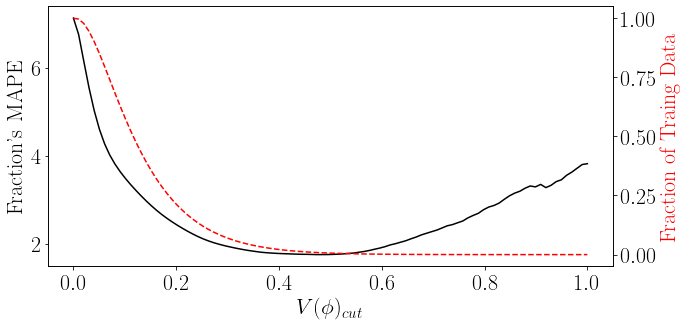

In [13]:
fig, ax = plt.subplots(1,1,figsize = (10,5), tight_layout = True)
ax2 = ax.twinx()
ax2.plot(cutoffs,fractions, 'r--')
ax.plot(cutoffs,fraction_mape, c = 'black')
ax.set_ylabel('Fraction\'s MAPE')
ax.set_xlabel(' $V(\phi)_{cut}$')
ax2.set_ylabel('Fraction of Traing Data',c = 'red')
best_cut = float(cutoffs[np.argmin(fraction_mape)])
ext = 'minvphi.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)


In [14]:
print('Best MAPE:',np.min(fraction_mape))
print('Best Cut:',cutoffs[np.argmin(fraction_mape)])

Best MAPE: 1.7556868069390292
Best Cut: 0.4747474747474748


In [15]:
Upper_cut = np.linspace(best_cut+0.02,1.4,100)
train_y_2 = train_y[np.where(train_y>best_cut)]
v_nn_2 = v_nn[np.where(train_y>best_cut)]
fraction_mape = []
fractions = []
for i in Upper_cut:
    index = [train_y_2<i]
    fractions.append(len(train_y_2[index])/train_y.shape[0])  
    fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)

/tmp/ipykernel_48556/420550681.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fractions.append(len(train_y_2[index])/train_y.shape[0])
/tmp/ipykernel_48556/420550681.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)


In [16]:
fraction_mape =np.nan_to_num(fraction_mape,0)

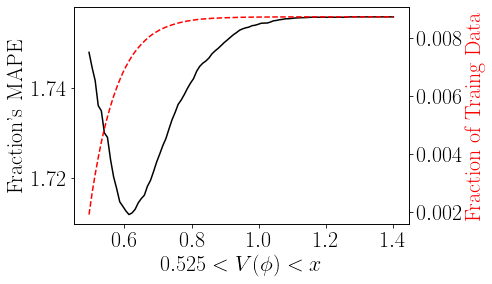

In [17]:
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(Upper_cut,fractions, 'r--')
ax.plot(Upper_cut,fraction_mape,c = 'black')
ax.set_ylabel('Fraction\'s MAPE')
ax2.set_ylabel('Fraction of Traing Data')
ax.set_xlabel('${} < V(\phi)< x $'.format(round(best_cut+0.05,3)))
ax2.set_ylabel('Fraction of Traing Data',c = 'red')
ext = 'minmaxvphi.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

In [18]:
optimum_cut = round(Upper_cut[np.argmin(fraction_mape)],2)
print('Optimised MAPE on the interval $0.2<V(\phi)<{}$'.format(optimum_cut))
optimum_fraction = len(train_y[np.where(train_y_2<optimum_cut)])/train_y.shape[0]
print('Fraction of the data in optimum interval = {}'.format(optimum_fraction))

Optimised MAPE on the interval $0.2<V(\phi)<0.61$
Fraction of the data in optimum interval = 0.007134545454545454


In [19]:
std = np.std(train_x[:,:8],axis = 1)
std.shape
eunorm = np.sum(train_x[:,:8]**2,axis = 1)

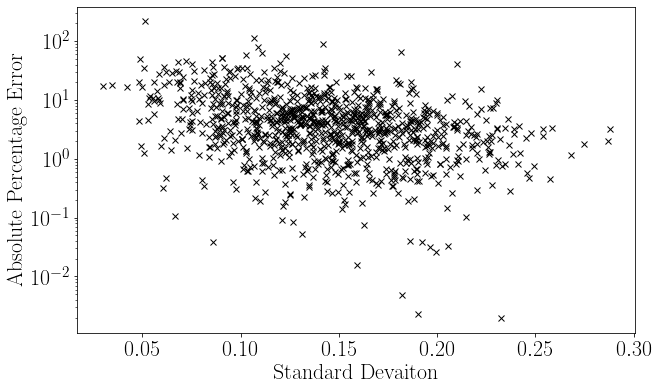

In [20]:
fig , ax = plt.subplots(1,figsize =(10,6))
ax.semilogy(std[:10**3],ape[:10**3],linestyle = '', marker = 'x', c = 'black')
ax.set_xlabel('Standard Devaiton')
ax.set_ylabel('Absolute Percentage Error')
ext = 'std.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

Suggests stadard deviaiton and APE have no correlation. which is frankly annoying. 

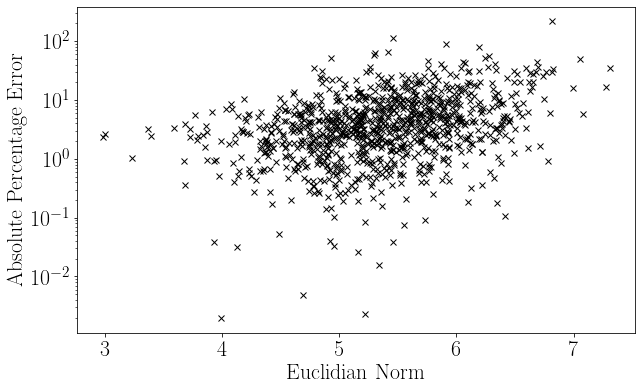

In [21]:
fig , ax = plt.subplots(1,figsize =(10,6))
ax.semilogy(eunorm[:10**3],ape[:10**3],linestyle = '', marker = 'x', c = 'black')
ax.set_xlabel('Euclidian Norm')
ax.set_ylabel('Absolute Percentage Error')
ext = 'eunorm.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)